In [369]:
%matplotlib inline

import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import Clustering
from sklearn.datasets import fetch_20newsgroups
import camPy
import pickle

#data_news = fetch_20newsgroups(subset='all',shuffle='FALSE', random_state=42,remove=('headers'))
data_news = pickle.load(open('datanews.p','rb'))
labels = data_news.target
vectorizer = sk.feature_extraction.text.CountVectorizer()
data = vectorizer.fit_transform(data_news.data)
feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)
index = np.argsort(labels)
labels = labels[index]
data= data[index]
data3 = data[np.in1d(labels,[1, 7,  11]),0:]
labels3=labels[np.in1d(labels,[1, 7,  11])]
data6 = data[np.in1d(labels,[1,  6,  7, 11, 18, 19]),0:]
labels6=labels[np.in1d(labels,[1,  6,  7, 11, 18, 19])]
data5 = data[np.in1d(labels,[1, 2,  3,4,5]),0:]
labels5=labels[np.in1d(labels,[1, 2,  3,4,5])]

In [317]:
np.array(data_news.target_names)[[1,  6,  7, 11, 18, 19]]
#prep = camPy.preprocessing(data)
#data = prep.do_it_all()

array(['comp.graphics', 'misc.forsale', 'rec.autos', 'sci.crypt',
       'talk.politics.misc', 'talk.religion.misc'], 
      dtype='<U24')

This has taken  10.0 seconds and is expected to take  427.6 seconds more 
This has taken  40.0 seconds and is expected to take  392.4 seconds more 
This has taken  70.0 seconds and is expected to take  362.9 seconds more 
This has taken  100.0 seconds and is expected to take  333.0 seconds more 
This has taken  130.0 seconds and is expected to take  304.5 seconds more 
This has taken  160.0 seconds and is expected to take  274.5 seconds more 
This has taken  190.1 seconds and is expected to take  246.4 seconds more 
This has taken  220.1 seconds and is expected to take  221.0 seconds more 
This has taken  250.1 seconds and is expected to take  195.7 seconds more 
This has taken  280.1 seconds and is expected to take  167.0 seconds more 
This has taken  310.1 seconds and is expected to take  140.2 seconds more 
This has taken  340.1 seconds and is expected to take  112.7 seconds more 
This has taken  370.1 seconds and is expected to take  81.8 seconds more 
This has taken  400.1 seconds

C:\Users\Andrew\Anaconda3\lib\site-packages\camPy\Clustering.py:17: RuntimeWarning: divide by zero encountered in true_divide
  D = scipy.sparse.diags(np.array(np.divide(1,np.sqrt(affinity.sum(axis=1)))).ravel(),dtype=np.float64)


0.567647498529
Our accuracy rate is: 0.71


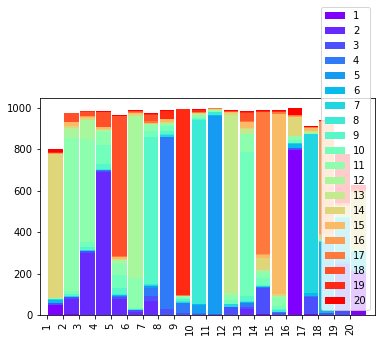

In [24]:
affinity = camPy.NN_graph(data,500)
l_spec = camPy.spectral_njw(affinity,20)
print(sk.metrics.adjusted_rand_score(l_spec,labels))
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print("Our accuracy rate is:",np.round(float(1-error),2))
plt.figure()
camPy.plot_clus(l_spec,labels)

In [350]:
prep = camPy.preprocessing(data3)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)

In [351]:
affinity = NN_graph(prep.ppmatrix,2000,use_values=True,by =100)
l_spec = camPy.spectral_njw(affinity,3)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels3)
print(np.round(float(1-error),2))
l_spec = camPy.spectral_ncut(affinity,3)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels3)
print(np.round(float(1-error),2))
l_spec = camPy.diffusion(affinity,3,0.5,2)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels3)
print(np.round(float(1-error),2))
l_spec = camPy.diffusion(affinity,3,0.5,0.5)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels3)
print(np.round(float(1-error),2))

 [ 348  503  946 1064 1237 1292]
0.94
 [ 348  503  946 1064 1237 1292]
0.94
 [ 348  503  946 1064 1237 1292]
0.93
 [ 348  503  946 1064 1237 1292]
0.94


(-0.18855708188115827,
 0.19176370986703029,
 -0.19282195073928263,
 0.20850071867626963)

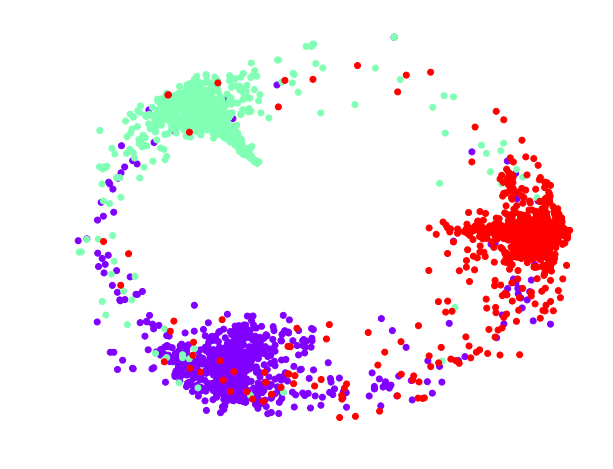

In [185]:
l=np.loadtxt(open('l.txt','rb'),delimiter=",")
labels3[labels3==11] = 3
labels3[labels3==7] = 2
color = plt.cm.rainbow((labels3-1)/ (np.unique(labels3).size-1))
plt.figure(figsize=(10,8))
plt.scatter(l[0:,0],l[0:,1],c=color)
plt.axis('off')

(-0.20351858860411329,
 0.2069878927342203,
 -0.20862058389737287,
 0.22563659861600088)

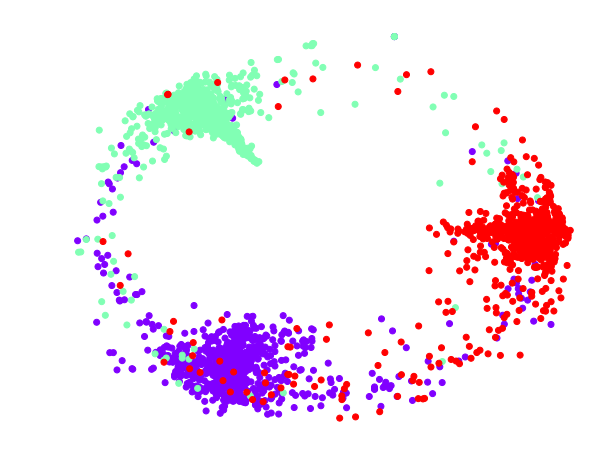

In [192]:
%matplotlib inline
l=np.loadtxt(open('v.txt','rb'),delimiter=",")
labels3[labels3==11] = 3
labels3[labels3==7] = 2
color = plt.cm.rainbow((labels3-1)/ (np.unique(labels3).size-1))
plt.figure(figsize=(10,8))
plt.scatter(l[0:,0],l[0:,1],c=color)
plt.axis('off')

In [265]:
prep = camPy.preprocessing(data5)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)

In [274]:
affinity = NN_graph(prep.ppmatrix,40,use_values=False,by =100)
k = 5
l_spec = camPy.spectral_njw(affinity,k)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels5)
print(np.round(float(1-error),2))
l_spec = camPy.spectral_ncut(affinity,k)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels5)
print(np.round(float(1-error),2))
l_spec = camPy.diffusion(affinity,k,0.5,2)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels5)
print(np.round(float(1-error),2))
l_spec = camPy.diffusion(affinity,k,0.5,0.5)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels5)
print(np.round(float(1-error),2))

0.56
0.45
0.55
0.56


In [331]:
prep = camPy.preprocessing(data6)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)

 [ 348  503  946  989 1008 1015 1071 1310 1420 1506 1668 1757 2212 2267 5014]
 [ 348  503  946  989 1008 1015 1071 1310 1420 1506 1668 1757 2212 2267 5014]
 [ 348  503  946  989 1008 1015 1071 1310 1420 1506 1668 1757 2212 2267 5014]
 [ 348  503  946  989 1008 1015 1071 1310 1420 1506 1668 1757 2212 2267 5014]
0.88
0.79
0.79
0.88


(-0.5, 5331.5, 5331.5, -0.5)

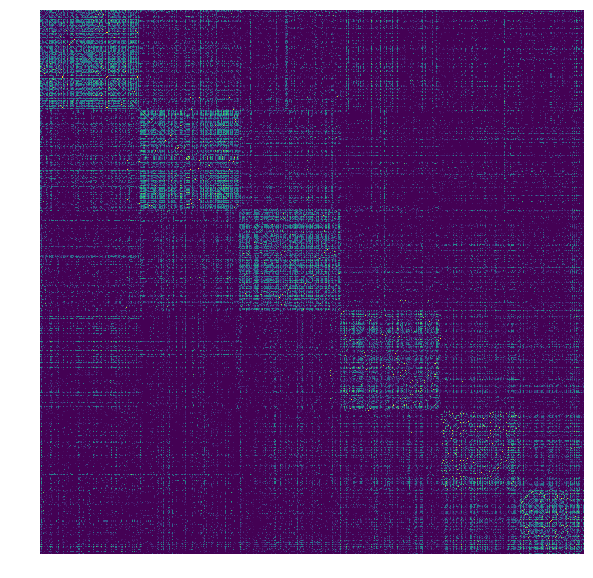

In [337]:
affinity = NN_graph(prep.ppmatrix,1000,use_values=True,by =100)
k = 6
l_spec = camPy.spectral_njw(affinity,k)
error1,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels6)
l_spec = camPy.spectral_ncut(affinity,k)
error2,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels6)
l_spec = camPy.diffusion(affinity,k,0.5,2)
error3,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels6)
l_spec = camPy.diffusion(affinity,k,0.5,0.5)
error4,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels6)
print(np.round(float(1-error1),2))
print(np.round(float(1-error2),2))
print(np.round(float(1-error3),2))
print(np.round(float(1-error4),2))
plt.figure(figsize=(10,10))
plt.imshow(affinity.todense())
plt.axis('off')

In [310]:
prep = camPy.preprocessing(data)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)

In [314]:
affinity = NN_graph(prep.ppmatrix,5000,use_values=True,by =100)
k = 20
l_spec = camPy.spectral_njw(affinity,k)
error1,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
l_spec = camPy.spectral_ncut(affinity,k)
error2,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
l_spec = camPy.diffusion(affinity,k,0.5,2)
error3,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
l_spec = camPy.diffusion(affinity,k,0.5,0.5)
error4,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print(np.round(float(1-error1),2))
print(np.round(float(1-error2),2))
print(np.round(float(1-error3),2))
print(np.round(float(1-error4),2))

This has taken  10.0 seconds and is expected to take  57.5 seconds more 
This has taken  40.2 seconds and is expected to take  24.5 seconds more 
 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  692

In [228]:
import numpy as np
import scipy.sparse as sparse
import sklearn.metrics as metrics
import time
def NN_graph(X,k,metric='cosine',use_values=True,f=lambda x:1-x,verbose = True,by=1):
    start_time = time.time()
    row = np.zeros(X.shape[0]*k,dtype=np.uint16)
    column = np.zeros(X.shape[0]*k,dtype=np.uint16)
    if use_values == True:
        values = np.zeros(X.shape[0]*k)
    n = 0
    elapsed_time = -20
    for i in np.arange(start=0,stop= X.shape[0],step=by):
        if sparse.issparse(X):
            dists = metrics.pairwise.pairwise_distances(X[i:(i+by), 0:],
                                                        X,
                                                        metric=metric)
        else:
            dists = metrics.pairwise.pairwise_distances(X[i:(i+by), 0:],
                                                    X,
                                                    metric=metric)
        index = np.argsort(dists[0:,0:],axis=1)[0:,:k+1]
        by = dists.shape[0]
        x = np.arange(start=i,stop=(i+by))
        row[n:(n+k*by)] = np.repeat(x,k,axis=0)
        column[n:(n+k*by)] = np.array(index[0:,1:(k+1)]).ravel()
        if use_values == True:
                values[n:(n+k*by)] = f(np.array(np.sort(dists,axis=1)[0:,1:k+1]).ravel())
        n += k*by
        if verbose:
            if time.time() -  elapsed_time - start_time > 30:
                elapsed_time = (time.time()-start_time)
                avg = (elapsed_time / i)*(X.shape[0]-i)
                print("This has taken ",
                    np.round(elapsed_time,1),
                    "seconds and is expected to take ",
                    np.round(avg,1),
                    "seconds more ")
    if use_values == True:
        NN = sparse.csr_matrix((np.array(values),
                            (np.array(row), np.array(column))),
                           dtype=np.float16)
    else:
        NN = sparse.csr_matrix((np.repeat(1, np.array(row).size),
                            (np.array(row), np.array(column))),
                           dtype=np.float16)
    return 0.5*(NN+NN.transpose())

In [229]:
prep = camPy.preprocessing(data)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)

In [235]:
affinity = NN_graph(prep.ppmatrix,500,use_values=True,by=100)
l_spec = camPy.spectral_njw(affinity,20)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print("Our accuracy rate is:",np.round(float(1-error),2))

This has taken  10.1 seconds and is expected to take  57.9 seconds more 
This has taken  40.3 seconds and is expected to take  25.8 seconds more 
 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
Our accuracy rate is: 0.7


In [236]:
l_spec = camPy.diffusion(affinity,20,0.5,2)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print("Our accuracy rate is:",np.round(float(1-error),2))

 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
Our accuracy rate is: 0.7


In [237]:
l_spec = camPy.diffusion(affinity,20,0.5,0.5)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print("Our accuracy rate is:",np.round(float(1-error),2))

 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
Our accuracy rate is: 0.69


In [238]:
l_spec = camPy.spectral_ncut(affinity,20)
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels)
print("Our accuracy rate is:",np.round(float(1-error),2))

 [  562  1147  1302  1745  1910  2059  2147  2148  2702  2845  2868  3530
  3886  3992  4252  4375  5491  5668  5706  5725  5732  5788  6027  6137
  6223  6385  6474  6929  6984  8403  8772  9487 10213 12670 13580 14109
 18528]
Our accuracy rate is: 0.63


In [16]:
vectorizer = sk.feature_extraction.text.CountVectorizer()
data = vectorizer.fit_transform([data_news.data[16557],data_news.data[5716]])
feature_names = vectorizer.get_feature_names()
feature_names = np.asarray(feature_names)


In [5]:
import pandas
pandas.DataFrame(data.todense(),columns=feature_names)

,an,dog,don,even,if,is,just,outrage,own,see,test,this,to,works
0,0,0,0,0,1,1,1,0,0,1,1,2,1,1
1,1,1,1,1,0,1,0,1,1,0,0,1,0,0


In [6]:
[data_news.data[16557],data_news.data[5716]]

['This is just a test to see if this works.\n\n',
 "This is an outrage!  I don't even own a dog.\n"]

In [18]:
prep = camPy.preprocessing(data)
prep.column_weighting('IDF')
prep.remove_columns_less_than_one()
#prep.PCA(1)
data = prep.ppmatrix

In [ ]:
import pandas
pandas.DataFrame(np.round(data.todense(),2),columns=feature_names)

This has taken  10.0 seconds and is expected to take  1.3 seconds more 
 [ 348  503  946 1064 1237 1292]
0.837499091922
Our accuracy rate is: 0.94


(-0.5, 2953.5, 2953.5, -0.5)

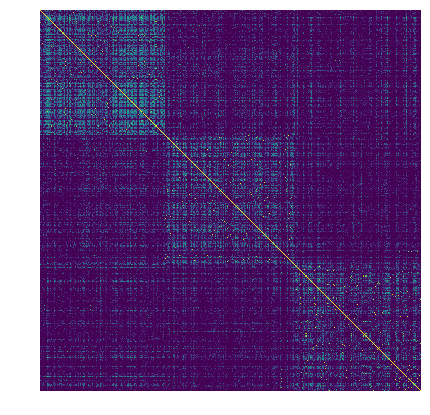

In [221]:
prep = camPy.preprocessing(data3)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.5)
prep.make_binary()
prep.column_weighting('IDF')
prep.normalize_rows('l2')
prep.PCA(n_components=100)
affinity = camPy.NN_graph(prep.ppmatrix,1000,use_values=True)
l_spec = camPy.spectral_njw(affinity,3)
print(sk.metrics.adjusted_rand_score(l_spec,labels3))
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels3)
print("Our accuracy rate is:",np.round(float(1-error),2))
plt.figure(figsize = (7,7))
plt.imshow(affinity.todense())
plt.axis('off')

 [ 348  503  946 1064 1237 1292]


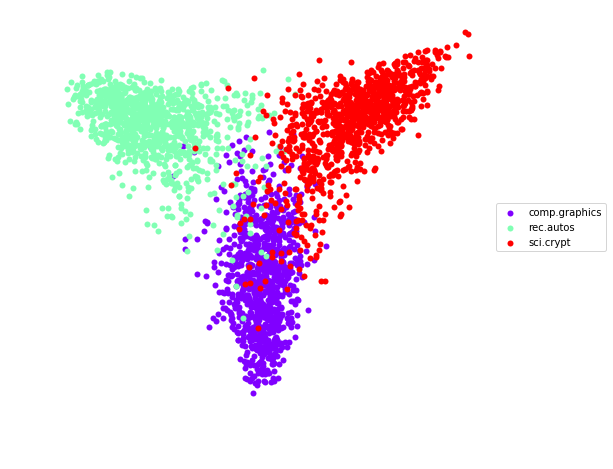

In [250]:
affinity= affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(),0)
L,remove = remove_degree_zero(affinity)
D = scipy.sparse.diags(np.array(np.divide(1,L.sum(axis=1))).ravel(),dtype=np.float64)
L = D*L
w,v = eigsh(L,k=3,tol=1e-5)
clusterer = sklearn.cluster.KMeans(3)
l= clusterer.fit_predict(v[0:,-3:-1])
labels3[labels3==11] = 3
labels3[labels3==7] = 2
color = plt.cm.rainbow((np.unique(labels3-1))/ (np.unique(labels3).size-1))
fig =plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
names = np.array(data_news.target_names)[[1,7, 11]]
for i in np.unique(labels3):
    ax.scatter(v[np.delete(labels3,remove) ==i,0],v[np.delete(labels3,remove) ==i,1],c=color[i-1],
               label = names[i-1],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


(-1.1058666678193425,
 1.1058666675791773,
 -1.0046088380953331,
 0.87185388976406708)

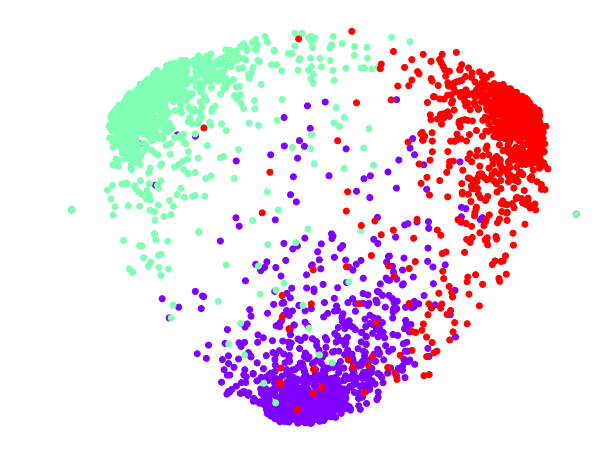

In [223]:
import scipy.sparse
from scipy.sparse.linalg import eigsh
import sklearn.preprocessing as pp
import sklearn.cluster
affinity= affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(),0)
D = scipy.sparse.diags(np.array(np.divide(1,np.sqrt(affinity.sum(axis=1)))).ravel(),dtype=np.float64)
L = D*affinity*D
w,v = eigsh(L,k=3,tol=1e-5)
v = pp.normalize(v,axis=1)
clusterer = sklearn.cluster.KMeans(3)
l= clusterer.fit_predict(v[0:,-3:-1])
labels3[labels3==11] = 3
labels3[labels3==7] = 2
color = plt.cm.rainbow((labels3-1)/ (np.unique(labels3).size-1))
plt.figure(figsize=(10,8))
plt.scatter(v[0:,-3],v[0:,-2],c=color)
plt.axis('off')

 [ 348  503  946 1064 1237 1292]


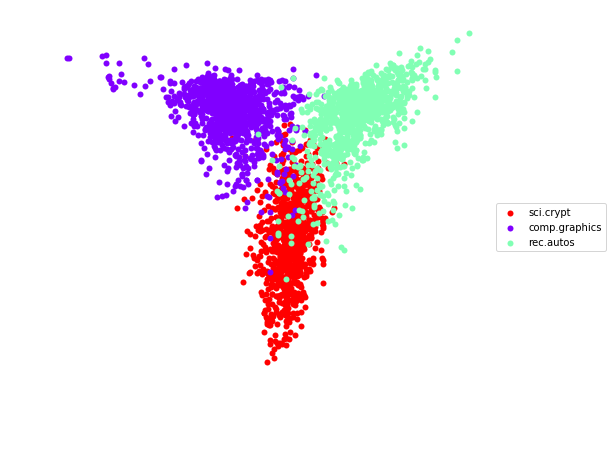

In [371]:
from scipy.sparse.linalg import eigsh
import sklearn.preprocessing as pp
import sklearn.cluster
affinity = affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(), 0)
L,remove = remove_degree_zero(affinity)
alpha = 0.5
n_clusters = 3
t = 5
D_alpha = scipy.sparse.diags(np.array(np.power(L.sum(axis=1),-alpha)).ravel(),dtype=np.float64)
L = D_alpha*L*D_alpha
L = (L+L.transpose())/2
w, v = eigsh(L, k=n_clusters, tol=1e-5)
v = D_alpha*v
v = v*np.power(w,t)
v = pp.normalize(v, axis=1)
c, l, i = sklearn.cluster.k_means(v[0:, -n_clusters:-1], n_clusters)
l = np.insert(l,remove,0)
count = 0
color = plt.cm.rainbow((np.unique(labels3))/ (np.unique(labels3).size-1))
fig =plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
names = np.array(data_news.target_names)[[1,   7,11]]
for i in np.unique(labels3):
    ax.scatter(v[np.delete(labels3,remove) ==i,0],v[np.delete(labels3,remove) ==i,1],c=color[i-1],
               label = names[i-1],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

 [ 348  503  946 1064 1237 1292]


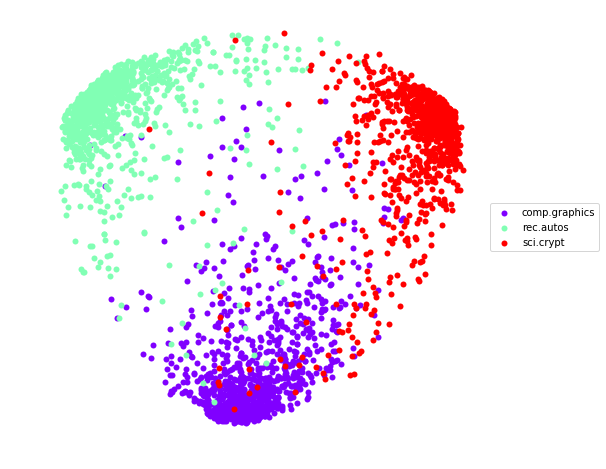

In [251]:
affinity= affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(),0)
L,remove = remove_degree_zero(affinity)
D = scipy.sparse.diags(np.array(np.divide(1,np.sqrt(L.sum(axis=1)))).ravel(),dtype=np.float64)
L = D*L*D
w,v = eigsh(L,k=3,tol=1e-5)
v = pp.normalize(v,axis=1)
v = np.dot(v,np.diag(np.power(w,.5)))
clusterer = sklearn.cluster.KMeans(3)
l= clusterer.fit_predict(v[0:,-3:-1])
color = plt.cm.rainbow((np.unique(labels3-1))/ (np.unique(labels3).size-1))
fig =plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
names = np.array(data_news.target_names)[[1,7, 11]]
for i in np.unique(labels3):
    ax.scatter(v[np.delete(labels3,remove) ==i,0],v[np.delete(labels3,remove) ==i,1],c=color[i-1],
               label = names[i-1],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

 [ 348  503  946 1064 1237 1292]


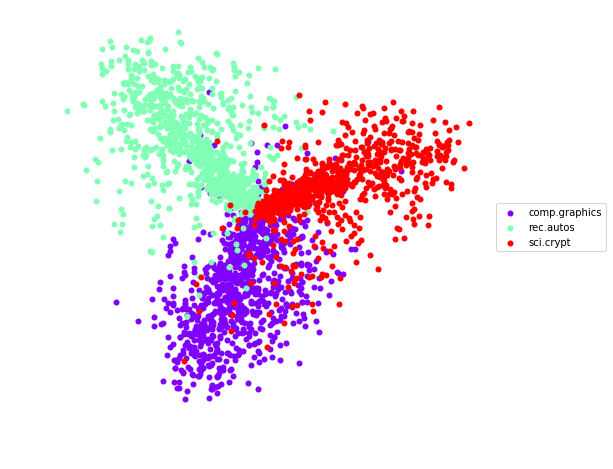

In [245]:
%matplotlib inline
affinity = affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(), 0)
L,remove = remove_degree_zero(affinity)
w, v = eigsh(L, k=3, tol=1e-5)
clusterer = sklearn.cluster.KMeans(3)
l= clusterer.fit_predict(v[0:,-3:-1])
l = np.insert(l,remove,0)
color = plt.cm.rainbow((np.unique(labels3)-1)/ (np.unique(labels3).size-1))
fig =plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
names = np.array(data_news.target_names)[[1,7, 11]]
for i in np.unique(labels3):
    ax.scatter(v[np.delete(labels3,remove) ==i,0],v[np.delete(labels3,remove) ==i,1],c=color[i-1],
               label = names[i-1],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [236]:
error,a = camPy.computing_percentage_of_misclassified_points(l,labels3)
print("Our accuracy rate is:",np.round(float(1-error),2))

array([1, 2, 3])

In [339]:
def remove_degree_zero(affinity):
    removed = np.arange(affinity.shape[0])[np.array(affinity.sum(axis=1) ==0).ravel()]
    if removed.shape[0] >0:
        print("Warning: there are observation with zero similarity to anything.",
              " The following observations were assign to group 0\n",removed)
        affinity = affinity[np.array(affinity.sum(axis=1) >0).ravel()]
        affinity = affinity[0:,np.array(affinity.sum(axis=0) >0).ravel()]
    return affinity,removed

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


(-0.31219958559396127,
 0.28327357991568031,
 -0.47382010383890094,
 0.4733229218835896)

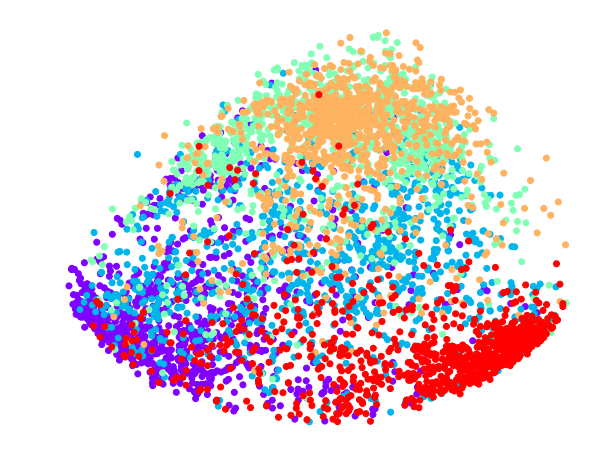

In [161]:
affinity= affinity - scipy.sparse.diags(np.array(affinity.diagonal()).ravel(),0)
D = scipy.sparse.diags(np.array(np.divide(1,np.sqrt(affinity.sum(axis=1)))).ravel(),dtype=np.float64)
L = D*affinity*D
w,v = eigsh(L,k=5,tol=1e-5)
v = pp.normalize(v,axis=1)
v = np.dot(v,np.diag(np.power(w,2)))
clusterer = sklearn.cluster.KMeans(5)
l= clusterer.fit_predict(v[0:,-5:-1])
color = plt.cm.rainbow((labels5-1)/ (np.unique(labels5).size-1))
plt.figure(figsize=(10,8))
plt.scatter(v[0:,-3],v[0:,-2],c=color)
plt.axis('off')

<IPython.core.display.Javascript object>


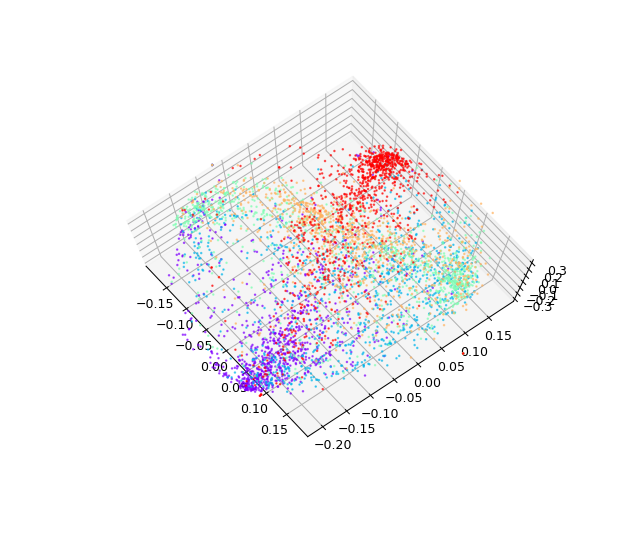

In [165]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v[0:,-5],v[0:,-3],v[0:,-2],alpha=.6,s=1,c=color)

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data*v[0,0:],data*v[1,0:],data*v[2,0:],alpha=1,s=20,c=color)

In [207]:
from __future__ import division, absolute_import, print_function

import numpy as np
import scipy.sparse as sparse
import sklearn.metrics as metrics
import time


def NN_graph(X,k,metric='cosine',use_values=True,f=lambda x:1-x,verbose = True):
    start_time = time.time()
    row = np.zeros(X.shape[0]*k,dtype=np.uint16)
    column = np.zeros(X.shape[0]*k,dtype=np.uint16)
    if use_values == True:
        values = np.zeros(X.shape[0]*k)
    n = 0
    elapsed_time = -20
    for i in np.arange(X.shape[0]):
        dists = metrics.pairwise.cosine_similarity(X[i, 0:].reshape(1,-1),X)
        index = np.argsort(1-dists[0,0:])
        row[n:(n + k)] = i
        column[n:(n + k)] = index[1:(k + 1)]
        if use_values == True:
            values[n:(n+k)] = f(1-dists[0,index[1:(k+1)]])
        n += k
        if verbose:
            if time.time() -  elapsed_time - start_time > 30:
                elapsed_time = (time.time()-start_time)
                avg = (elapsed_time / i)*(X.shape[0]-i)
                print("This has taken ",
                    np.round(elapsed_time,1),
                    "seconds and is expected to take ",
                    np.round(avg,1),
                    "seconds more ")
    if use_values == True:
        NN = sparse.csr_matrix((np.array(values),
                            (np.array(row), np.array(column))),
                           dtype=np.float16)
    else:
        NN = sparse.csr_matrix((np.repeat(1, np.array(row).size),
                            (np.array(row), np.array(column))),
                           dtype=np.float16)
    return 0.5*(NN+NN.transpose())

This has taken  10.0 seconds and is expected to take  29.3 seconds more 


C:\Users\Andrew\Anaconda3\lib\site-packages\camPy\Clustering.py:17: RuntimeWarning: divide by zero encountered in true_divide
  D = scipy.sparse.diags(np.array(np.divide(1,np.sqrt(affinity.sum(axis=1)))).ravel(),dtype=np.float64)


0.741827137814
Our accuracy rate is: 0.88


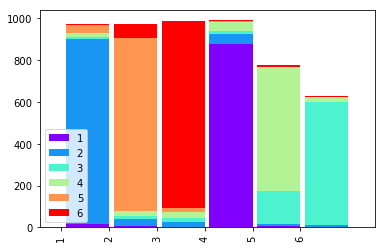

In [208]:
affinity = NN_graph(data6,1000,use_values=True)
l_spec = camPy.spectral_njw(affinity,6)
print(sk.metrics.adjusted_rand_score(l_spec,labels6))
error,a = camPy.computing_percentage_of_misclassified_points(l_spec,labels6)
print("Our accuracy rate is:",np.round(float(1-error),2))
plt.figure()
camPy.plot_clus(l_spec,labels6)

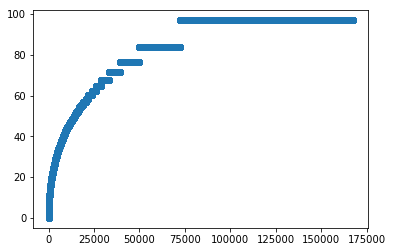

In [217]:
fac = camPy.factor_weighting(data)
plt.scatter(np.arange(fac.col_occurance.shape[0]),np.array(fac.IDF(2).sum(axis=0)).ravel()[np.argsort(fac.col_occurance)[::-1]])

<IPython.core.display.Javascript object>


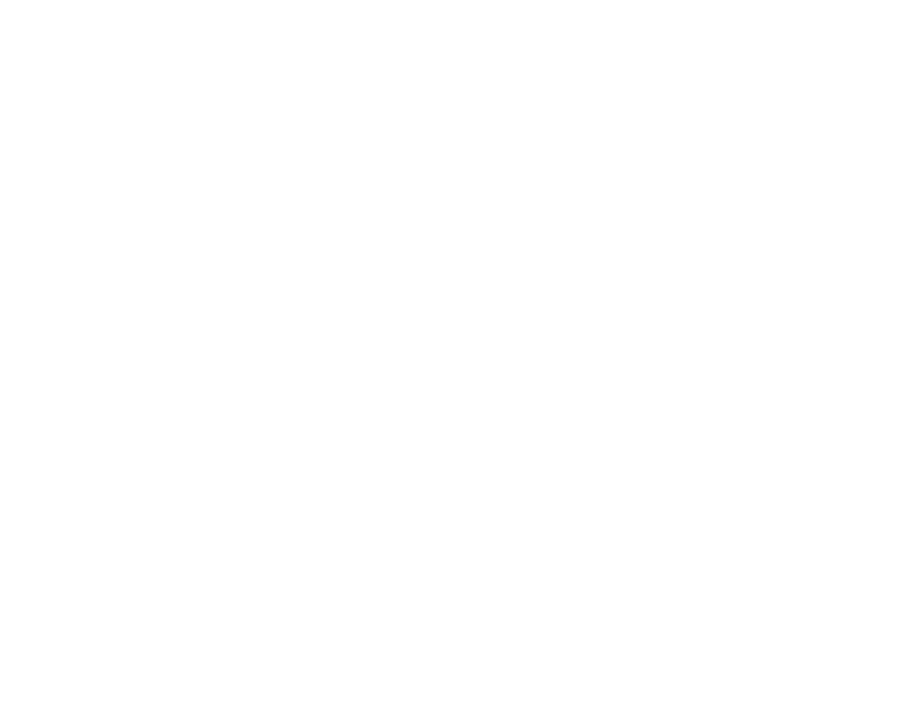

In [322]:
import scipy.sparse
data6 = data[np.in1d(labels,[1, 2,  3,4,5]),0:]
labels6=labels[np.in1d(labels,[1, 2,  3,4,5])]
prep = camPy.preprocessing(data6)
prep.remove_columns_less_than_one()
prep.make_binary()
prep.remove_common_columns(0.6)
prep.column_weighting('IDF')
prep.normalize_rows('l2')
data6 = prep.ppmatrix
u, s, v = scipy.sparse.linalg.svds(data6,k=3)
data6 = u*scipy.sparse.diags(s)
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
count = 0
for i in [1, 2,  3,4,5]:
    labels6[labels6 ==i] = count
    count += 1
ax = fig.add_subplot(111, projection='3d')
color = plt.cm.rainbow(np.unique(labels6)/ (np.unique(labels6).size-1))
names = np.array(data_news.target_names)[[1, 2,  3,4,5]]
for i in np.unique(labels6):
    ax.scatter(data6[labels6 ==i,0],data6[labels6 ==i,1],data6[labels6 ==i,2],alpha=.5,s=20,c=color[i],
               label = names[i],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>


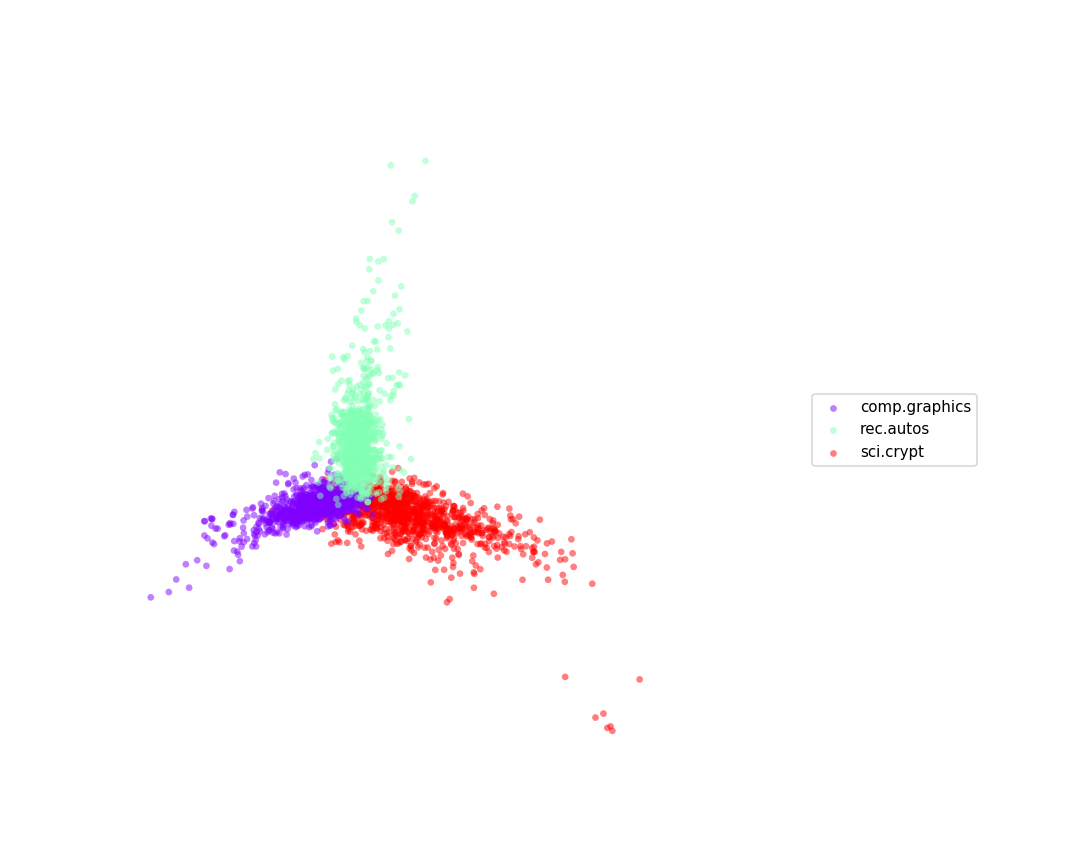

In [326]:
group = [1, 7,  11]
data3 = data[np.in1d(labels,group),0:]
labels3=labels[np.in1d(labels,group)]
prep = camPy.preprocessing(data3)
prep.remove_columns_less_than_one()
prep.make_binary()
prep.remove_common_columns(0.6)
prep.column_weighting('IDF')
prep.normalize_rows('l2')
data3 = prep.ppmatrix
u, s, v = scipy.sparse.linalg.svds(data3,k=3)
data3 = u*scipy.sparse.diags(s)
%matplotlib notebook
fig = plt.figure(figsize=(10,8))
count = 0
for i in group:
    labels3[labels3 ==i] = count
    count += 1
ax = fig.add_subplot(111, projection='3d')
color = plt.cm.rainbow(np.unique(labels3)/ (np.unique(labels3).size-1))
names = np.array(data_news.target_names)[group]
for i in np.unique(labels3):
    ax.scatter(data3[labels3 ==i,0],data3[labels3 ==i,1],data3[labels3 ==i,2],alpha=.5,s=20,c=color[i],
               label = names[i],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<IPython.core.display.Javascript object>


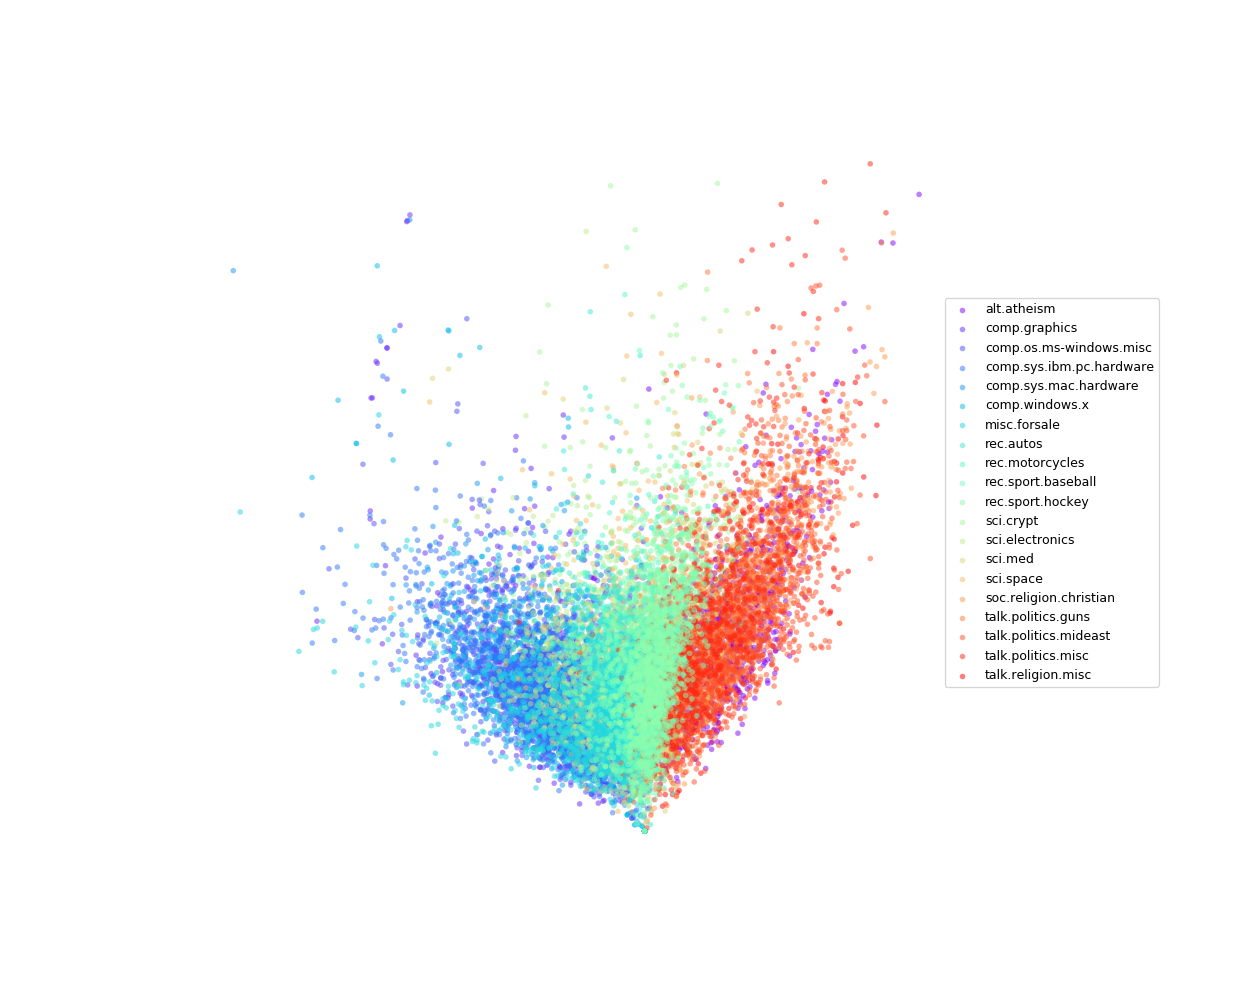

In [259]:
data3 = data
labels3=labels
prep = camPy.preprocessing(data3)
prep.remove_columns_less_than_one()
prep.make_binary()
prep.remove_common_columns(0.6)
prep.column_weighting('IDF')
prep.normalize_rows('l2')
data3 = prep.ppmatrix
u, s, v = scipy.sparse.linalg.svds(data3,k=3)
data3 = u*scipy.sparse.diags(s)
%matplotlib notebook
fig = plt.figure(figsize=(14,11))
ax = fig.add_subplot(111, projection='3d')
color = plt.cm.rainbow(np.unique(labels3)/ (np.unique(labels3).size-1))
names = np.array(data_news.target_names)
for i in np.unique(labels3):
    ax.scatter(data3[labels3 ==i,0],data3[labels3 ==i,1],data3[labels3 ==i,2],alpha=.5,s=20,c=color[i],
               label = names[i],linewidths=0)
ax.axis('off')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [274]:
group = 14
data6 = data[np.in1d(labels,[group]),0:].astype(np.float)
prep = camPy.preprocessing(data6)
prep.remove_columns_less_than_one()
prep.remove_common_columns(0.6)
prep.make_binary()
#prep.column_weighting('IDF')
#prep.normalize_rows('l2')
u, s, v = scipy.sparse.linalg.svds(prep.ppmatrix*.999,k=1)
feature_names_6 = feature_names[prep.index]

In [275]:
print("from ", data_news.target_names[group])
print(feature_names_6[np.argsort(np.abs(v).ravel())[-20:][::-1]])
x = np.array(prep.ppmatrix.sum(axis=0)).ravel()
print(feature_names_6[np.argsort(x)[-20:][::-1]])

from  sci.space
['this' 'have' 'not' 'are' 'as' 'you' 'but' 'with' 'writes' 'edu' 'if' 'at'
 'or' 'from' 'would' 'they' 'can' 'space' 'article' 'there']
['writes' 'this' 'edu' 'you' 'not' 'have' 'are' 'but' 'as' 'if' 'article'
 'or' 'with' 'at' 'from' 'would' 'space' 'they' 'there' 'can']


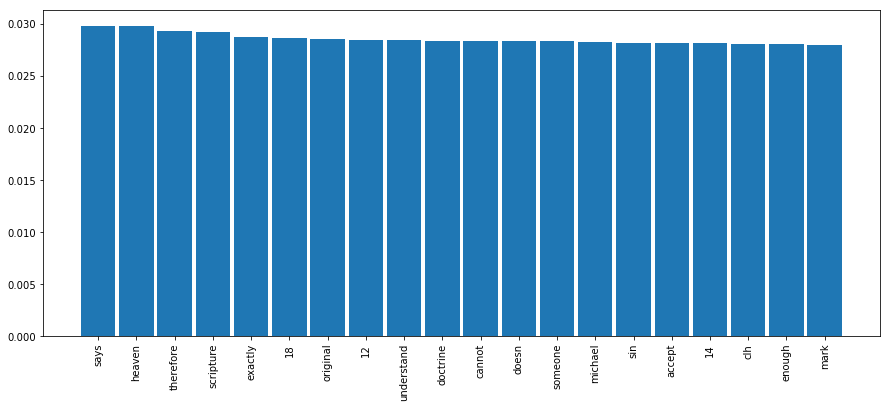

In [166]:
plt.figure(figsize=(15,6))
ax = plt.subplot(111)
ax.bar(np.arange(20) + 1, np.sort(np.abs(v).ravel())[-20:][::-1], bottom=0, width=.9)
ax.set_xticks(np.arange(20)+1)
ax.set_xticklabels(list(feature_names_6[np.argsort(np.abs(v).ravel())[-20:][::-1]].flat), rotation=90)


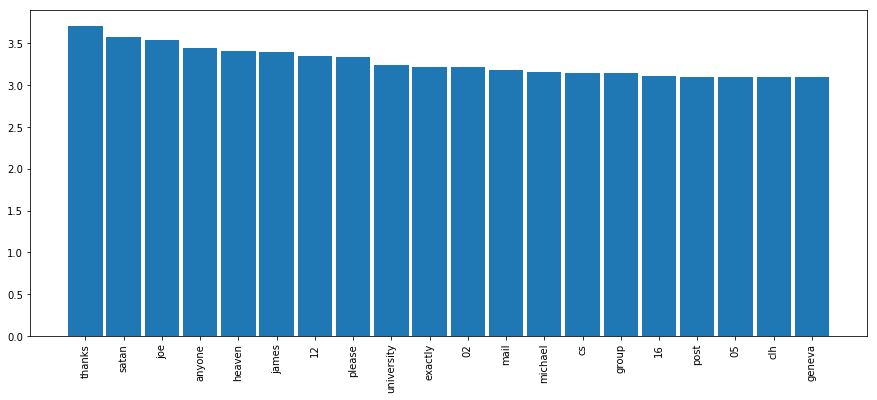

In [167]:
plt.figure(figsize=(15,6))
ax = plt.subplot(111)
x = np.array(prep.ppmatrix.sum(axis=0)).ravel()
ax.bar(np.arange(20) + 1, np.sort(x)[-20:][::-1], bottom=0, width=.9)
ax.set_xticks(np.arange(20)+1)
ax.set_xticklabels(list(feature_names_6[np.argsort(x)[-20:][::-1]].flat),
                   rotation=90)

In [218]:
def plot_clus(l,t,names=None):
    counts = np.zeros(np.unique(t).shape[0])
    count = np.zeros(np.unique(t).shape[0])
    ax = plt.subplot(111)
    color = plt.cm.rainbow(np.arange(np.unique(l).size) / (np.unique(l).size-1))
    o = 0
    han = list()
    for i in np.unique(l):
        count = count + counts
        counts = np.zeros(np.unique(t).shape[0])
        k = 0
        for j in np.unique(t):
            counts[k] = np.sum((l == i)[t == j])
            k = k + 1
        p1 = ax.bar(np.arange(np.unique(t).shape[0]) + 1, counts, color=color[o],
                    bottom=count, width=.9,label="cluster "+str(i+1))
        han.append(p1)
        o = o + 1
    plt.xlim((0, np.unique(t).shape[0]+1))
    ax.set_xticks(np.arange(np.unique(t).shape[0])+1)
    if names ==None:
        ax.set_xticklabels(np.arange(np.unique(t).shape[0])+1, rotation=90)
    else:
        ax.set_xticklabels(names, rotation=90)
    plt.legend(han, np.unique(l) + 1)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


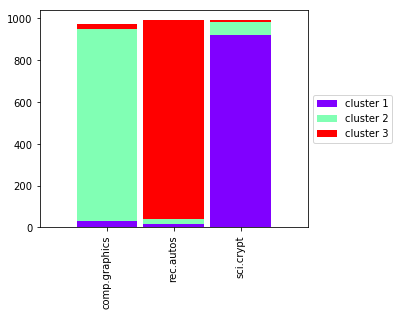

In [219]:
plot_clus(l_spec,labels3,np.array(data_news.target_names)[[1,7,11]])

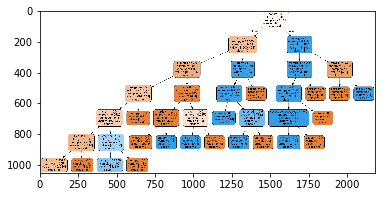

In [283]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pydot
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

digital_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=6)
digital_tree.fit(data3[(l_spec==0)+(l_spec==1)],l_spec[(l_spec==0)+(l_spec==1)])

with open("digital.dot", 'w') as f:
    f = tree.export_graphviz(digital_tree, 
                            feature_names=feature_names,
                            class_names=["0","1"],
                            filled=True, rounded=True,
                            out_file=f)
(graph,) = pydot.graph_from_dot_file("digital.dot")
graph.write_png("digital.png")

plt.imshow(img.imread('digital.png'))
plt.show()

In [316]:
def show_top10(classifier, feature_names, categories):
    for i, category in enumerate(categories):
        top10 = np.argsort(np.array(clf.coef_[0].todense()).ravel())[-20:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

In [317]:
from sklearn.svm import SVC
clf = SVC(verbose=True,kernel='linear',decision_function_shape='ovr')
clf.fit(data3,l_spec)
show_top10(clf,feature_names,np.array(data_news.target_names)[np.array([1, 11,7])])

[LibSVM]comp.graphics: software need quit hope disconcerting kwansik comp bbs 3d image offline autodesk rick post news program hello graphics testing probable
sci.crypt: software need quit hope disconcerting kwansik comp bbs 3d image offline autodesk rick post news program hello graphics testing probable
rec.autos: software need quit hope disconcerting kwansik comp bbs 3d image offline autodesk rick post news program hello graphics testing probable


In [323]:
np.sort(np.array(clf.coef_[2].todense()).ravel())[-20:]

array([ 0.1063162 ,  0.11072927,  0.11154664,  0.1187991 ,  0.1220035 ,
        0.12597178,  0.12958913,  0.13037099,  0.13435722,  0.13495601,
        0.13651377,  0.14063188,  0.14459864,  0.14510783,  0.15412715,
        0.15451608,  0.16153594,  0.16986213,  0.19271973,  0.29030714])

In [342]:
(clf.coef_[0]*data3[1000].transpose()).todense()

matrix([[-2.96393615]])

In [336]:
clf.coef_[0,2].transpose()

0.0